In [1]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import NesterovMomentumOptimizer

# 1-Introduction to quantum computation

# All about qubits

## 1.1.1-Normalization of quantum states

In [2]:
# Here are the vector representations of |0> and |1>, for convenience
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])


def normalize_state(alpha, beta):
    """Compute a normalized quantum state given arbitrary amplitudes.

    Args:
        alpha (complex): The amplitude associated with the |0> state.
        beta (complex): The amplitude associated with the |1> state.

    Returns:
        np.array[complex]: A vector (numpy array) with 2 elements that represents
        a normalized quantum state.
    """

    ##################
    nor = np.sqrt(np.abs(alpha)**2+np.abs(beta)**2)
    a = alpha/nor
    b = beta/nor
    state = np.array([a,b])
    ##################

    # CREATE A VECTOR [a', b'] BASED ON alpha AND beta SUCH THAT |a'|^2 + |b'|^2 = 1

    # RETURN A VECTOR
    return state

## 1.1.2-Inner product and orthonormal bases

In [3]:
def inner_product(state_1, state_2):
    """Compute the inner product between two states.

    Args:
        state_1 (np.array[complex]): A normalized quantum state vector
        state_2 (np.array[complex]): A second normalized quantum state vector

    Returns:
        complex: The value of the inner product <state_1 | state_2>.
    """

    ##################
    iner = np.conjugate(state_1[0])*state_2[0]+np.conjugate(state_1[1])*state_2[1]
    ##################

    # COMPUTE AND RETURN THE INNER PRODUCT

    return iner


# Test your results with this code
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])

print(f"<0|0> = {inner_product(ket_0, ket_0)}")
print(f"<0|1> = {inner_product(ket_0, ket_1)}")
print(f"<1|0> = {inner_product(ket_1, ket_0)}")
print(f"<1|1> = {inner_product(ket_1, ket_1)}")

<0|0> = 1
<0|1> = 0
<1|0> = 0
<1|1> = 1


## 1.1.3-Sampling measurment outcomes

In [4]:
def measure_state(state, num_meas):
    """Simulate a quantum measurement process.

    Args:
        state (np.array[complex]): A normalized qubit state vector.
        num_meas (int): The number of measurements to take

    Returns:
        np.array[int]: A set of num_meas samples, 0 or 1, chosen according to the probability
        distribution defined by the input state.
    """

    ##################
    a = abs(state[0])**2
    b = abs(state[1])**2
    d = np.random.choice([0,1],  num_meas, p=[a,b])
    ##################

    # COMPUTE THE MEASUREMENT OUTCOME PROBABILITIES

    # RETURN A LIST OF SAMPLE MEASUREMENT OUTCOMES

    return d

In [5]:
state = np.array([0.8, 0.6])
num_meas = 10
measure_state(state, num_meas)

tensor([1, 1, 1, 0, 1, 0, 0, 1, 0, 0], requires_grad=True)

## 1.1.4-Applying a quantum operation

In [6]:
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


def apply_u(state):
    """Apply a quantum operation.

    Args:
        state (np.array[complex]): A normalized quantum state vector.

    Returns:
        np.array[complex]: The output state after applying U.
    """

    ##################
    state_n0=(U[0][0]*state[0]+U[0][1]*state[1])
    state_n1=(U[1][0]*state[0]+U[1][1]*state[1])
    state_n = np.array([state_n0,state_n1])
    ##################

    # APPLY U TO THE INPUT STATE AND RETURN THE NEW STATE
    return state_n

In [7]:
apply_u(state)

tensor([0.98994949, 0.14142136], requires_grad=True)

# 1.1.5-A simple quantum algorithm

In [8]:
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


def initialize_state():
    """Prepare a qubit in state |0>.

    Returns:
        np.array[float]: the vector representation of state |0>.
    """

    ##################
    k0 = np.array([1, 0])
    ##################

    # PREPARE THE STATE |0>
    return k0


def apply_u(state):
    """Apply a quantum operation."""
    return np.dot(U, state)


def measure_state(state, num_meas):
    """Measure a quantum state num_meas times."""
    p_alpha = np.abs(state[0]) ** 2
    p_beta = np.abs(state[1]) ** 2
    meas_outcome = np.random.choice([0, 1], p=[p_alpha, p_beta], size=num_meas)
    return meas_outcome


def quantum_algorithm():
    """Use the functions above to implement the quantum algorithm described above.

    Try and do so using three lines of code or less!

    Returns:
        np.array[int]: the measurement results after running the algorithm 100 times
    """

    ##################
    a = initialize_state()
    b = apply_u(a)
    c = measure_state(b, 100)
    ##################

    # PREPARE THE STATE, APPLY U, THEN TAKE 100 MEASUREMENT SAMPLES
    return c

In [9]:
quantum_algorithm()

tensor([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
        1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
        0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
        0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], requires_grad=True)

# Quantum Circuits

## 1.2.1-Order of operations

In [10]:
def my_circuit(theta, phi):
    ##################
    # YOUR CODE HERE #
    ##################

    # REORDER THESE 5 GATES TO MATCH THE CIRCUIT IN THE PICTURE

    qml.CNOT(wires=[0, 1]) 
    qml.Hadamard(wires=0)
    qml.RX(theta, wires=2)
    qml.CNOT(wires=[2, 0])
    qml.RY(phi, wires=1)

    # This is the measurement; we return the probabilities of all possible output states
    # You'll learn more about what types of measurements are available in a later node
    return qml.probs(wires=[0, 1, 2])

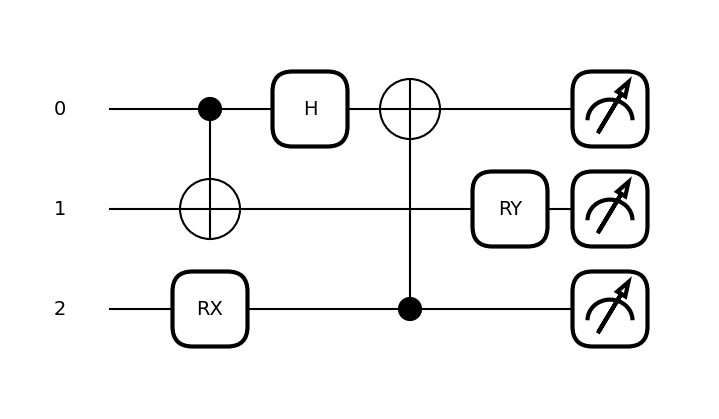

In [11]:
import matplotlib.pyplot as plt
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(my_circuit)(0,0)
plt.show()

## 1.2.2-Building a Qnode

In [12]:
# This creates a device with three wires on which PennyLane can run computations
dev = qml.device("default.qubit", wires=3)


def my_circuit(theta, phi, omega):

    ##################
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[1,2])
    qml.CNOT(wires=[2,0])
    ##################

    # IMPLEMENT THE CIRCUIT BY ADDING THE GATES

    # Here are two examples, so you can see the format:
    # qml.CNOT(wires=[0, 1])
    # qml.RX(theta, wires=0)

    return qml.probs(wires=[0, 1, 2])


# This creates a QNode, binding the function and device
my_qnode = qml.QNode(my_circuit, dev)

# We set up some values for the input parameters
theta, phi, omega = 0.1, 0.2, 0.3

# Now we can execute the QNode by calling it like we would a regular function
my_qnode(theta, phi, omega)


tensor([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
        2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03], requires_grad=True)

## 1.2.3-The Qnode decoder

In [13]:
dev = qml.device("default.qubit", wires=3)

##################
@qml.qnode(dev)
##################

# DECORATE THE FUNCTION BELOW TO TURN IT INTO A QNODE


def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])


theta, phi, omega = 0.1, 0.2, 0.3

##################
my_circuit(theta, phi, omega)
##################

# RUN THE QNODE WITH THE PROVIDED PARAMETERS

tensor([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
        2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03], requires_grad=True)

## 1.2.4-Circuit depth

In [14]:
dev = qml.device("default.qubit", wires=3)


@qml.qnode(dev)
def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])


##################
# YOUR CODE HERE #
##################

# FILL IN THE CORRECT CIRCUIT DEPTH
depth = 4

# Unitary Matrices

## 1.3.1-Unitaries in Pennylane

In [15]:
dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


@qml.qnode(dev)
def apply_u():

    ##################
    qml.QubitUnitary(U, wires=0)
    ##################

    # USE QubitUnitary TO APPLY U TO THE QUBIT

    # Return the state
    return qml.state()

In [16]:
apply_u()

tensor([0.70710678+0.j, 0.70710678+0.j], requires_grad=True)

## 1.3.2-Parametrized unitaries

In [17]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_u_as_rot(phi, theta, omega):

    ##################
    qml.Rot(phi, theta, omega, wires=0)
    ##################

    # APPLY A ROT GATE USING THE PROVIDED INPUT PARAMETERS

    # RETURN THE QUANTUM STATE VECTOR

    return qml.state()

In [18]:
apply_u_as_rot(phi=0, theta=0, omega=0)

tensor([1.+0.j, 0.+0.j], requires_grad=True)

# 2-Single Qubit Gates

# X and H

## 1.4.1-Flipping bits

In [19]:
dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


@qml.qnode(dev)
def varied_initial_state(state):
    """Complete the function such that we can apply the operation U to
    either |0> or |1> depending on the input argument flag.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise, leave it in state 0.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    ##################
    if state==1:
        qml.PauliX(wires=0)
    qml.QubitUnitary(U,wires=0)
    ##################

    # KEEP THE QUBIT IN |0> OR CHANGE IT TO |1> DEPENDING ON THE state PARAMETER

    # APPLY U TO THE STATE

    return qml.state()

In [20]:
varied_initial_state(1)

tensor([ 0.70710678+0.j, -0.70710678+0.j], requires_grad=True)

## 1.4.2-Uniform superposition

In [21]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_hadamard():
    ##################
    qml.Hadamard(wires=0)
    ##################

    # APPLY THE HADAMARD GATE

    # RETURN THE STATE
    return qml.state()

In [22]:
apply_hadamard()

tensor([0.70710678+0.j, 0.70710678+0.j], requires_grad=True)

## 1.4.3-Combining X  and H

In [23]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_hadamard_to_state(state):
    """Complete the function such that we can apply the Hadamard to
    either |0> or |1> depending on the input argument flag.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise, leave it in state 0.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    ##################
    if state==1:
        qml.PauliX(wires=0)
    qml.Hadamard(wires=0)    
    ##################

    # KEEP THE QUBIT IN |0> OR CHANGE IT TO |1> DEPENDING ON state

    # APPLY THE HADAMARD

    # RETURN THE STATE

    return qml.state()


print(apply_hadamard_to_state(0))
print(apply_hadamard_to_state(1))

[0.70710678+0.j 0.70710678+0.j]
[ 0.70710678+0.j -0.70710678+0.j]


## 1.4.4-A Qnode with X and H

In [24]:
dev = qml.device("default.qubit", wires=1)

##################
@qml.qnode(dev)
def apply_hxh(state):
    if state==1:
        qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
     
    return qml.state()
##################

# CREATE A DEVICE

# CREATE A QNODE CALLED apply_hxh THAT APPLIES THE CIRCUIT ABOVE

# Print your results
print(apply_hxh(0))
print(apply_hxh(1))

[1.+0.j 0.+0.j]
[ 0.+0.j -1.+0.j]


# It's just a phase

## 1.5.1-The Pauli Z gate

In [25]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_z_to_plus():
    """Write a circuit that applies PauliZ to the |+> state and returns
    the state.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """

    ##################
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)
    ##################

    # CREATE THE |+> STATE

    # APPLY PAULI Z

    # RETURN THE STATE
    return qml.state()


print(apply_z_to_plus())
print('|+> becomes |-> ')

[ 0.70710678+0.j -0.70710678+0.j]
|+> becomes |-> 


## 1.5.2-The Z Rotation

In [26]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def fake_z():
    """Use RZ to produce the same action as Pauli Z on the |+> state.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    qml.Hadamard(wires=0)

    qml.RZ(np.pi*(-1),wires=0)

    # RETURN THE STATE
    return qml.state()

In [27]:
fake_z()

tensor([4.32978028e-17+0.70710678j, 4.32978028e-17-0.70710678j], requires_grad=True)

## 1.5.3-The S and T gates

In [28]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def many_rotations():
    """Implement the circuit depicted above and return the quantum state.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    qml.Hadamard(wires=0)
    qml.S(wires=0)
    qml.adjoint(qml.T)(wires=0)
    qml.RZ(0.3,wires=0)
    qml.adjoint(qml.S)(wires=0)
    

    # RETURN THE STATE

    return qml.state()

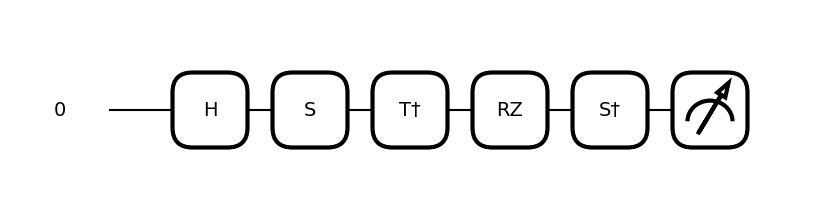

In [29]:
import matplotlib.pyplot as plt
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(many_rotations)()
plt.show()

In [30]:
many_rotations()

tensor([0.69916673-0.10566872j, 0.56910461-0.41966647j], requires_grad=True)

# From a different angle

## 1.6.1-Applying RX

In [31]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_rx_pi(state):
    """Apply an RX gate with an angle of \pi to a particular basis state.

    Args:
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    qml.RX(np.pi,wires=0)
    ##################

    # APPLY RX(pi) AND RETURN THE STATE

    return qml.state()


print(apply_rx_pi(0))
print(apply_rx_pi(1))


[6.123234e-17+0.j 0.000000e+00-1.j]
[0.000000e+00-1.j 6.123234e-17+0.j]


# 1.6.2-Plotting RX

/Users/neda/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


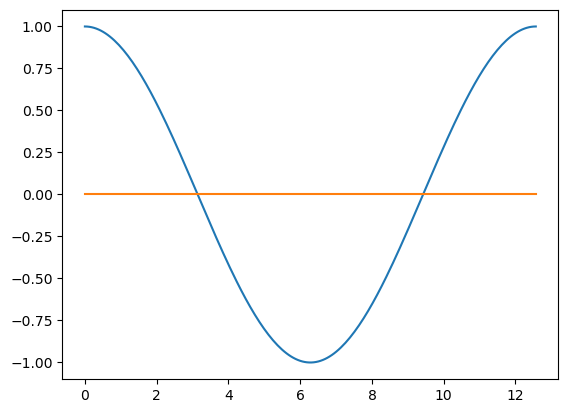

In [32]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_rx(theta, state):
    """Apply an RX gate with an angle of theta to a particular basis state.

    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    qml.RX(theta,wires=0)
    ##################

    # APPLY RX(theta) AND RETURN THE STATE

    return qml.state()


# Code for plotting
angles = np.linspace(0, 4 * np.pi, 200)
output_states = np.array([apply_rx(t, 0) for t in angles])
plot = plt.plot(angles, output_states)

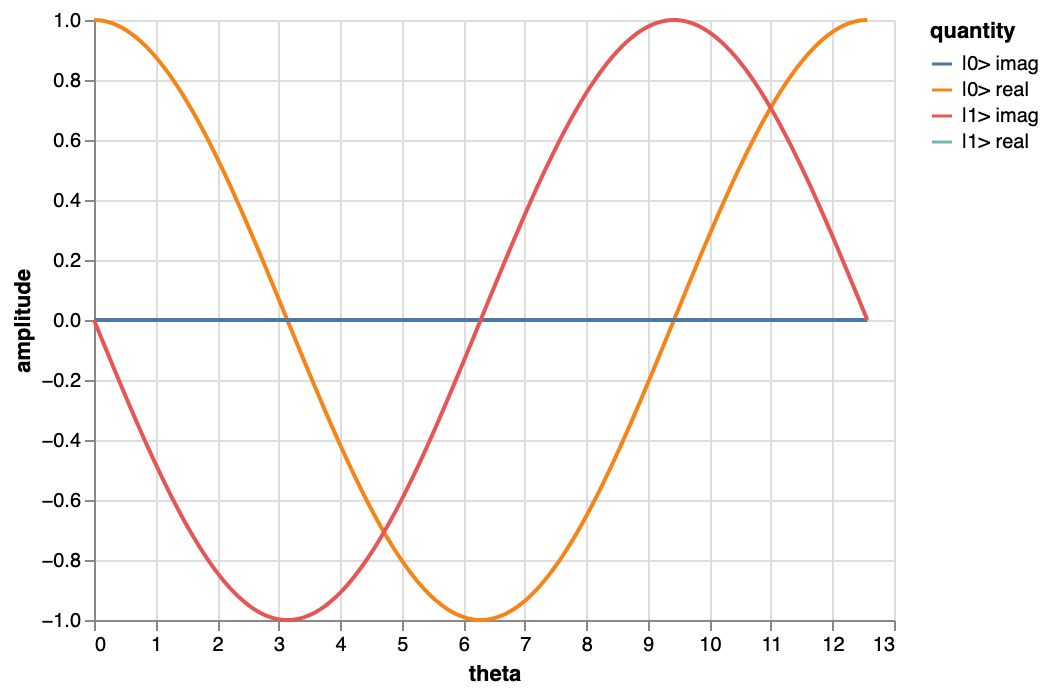

# 1.6.3-Plotting RY

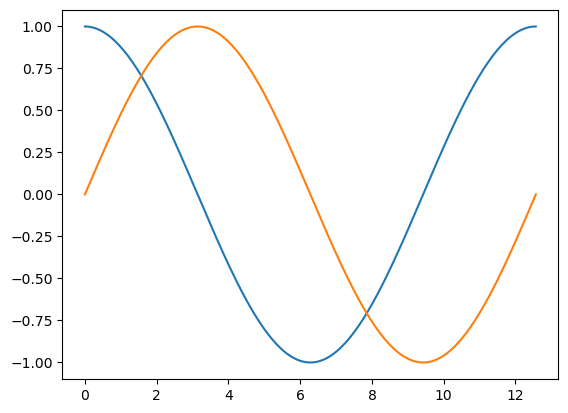

In [33]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_ry(theta, state):
    """Apply an RY gate with an angle of theta to a particular basis state.

    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    qml.RY(theta,wires=0)
    ##################

    # APPLY RY(theta) AND RETURN THE STATE

    return qml.state()


# Code for plotting
angles = np.linspace(0, 4 * np.pi, 200)
output_states = np.array([apply_ry(t, 0) for t in angles])

#print(output_states)

plot = plt.plot(angles, output_states)

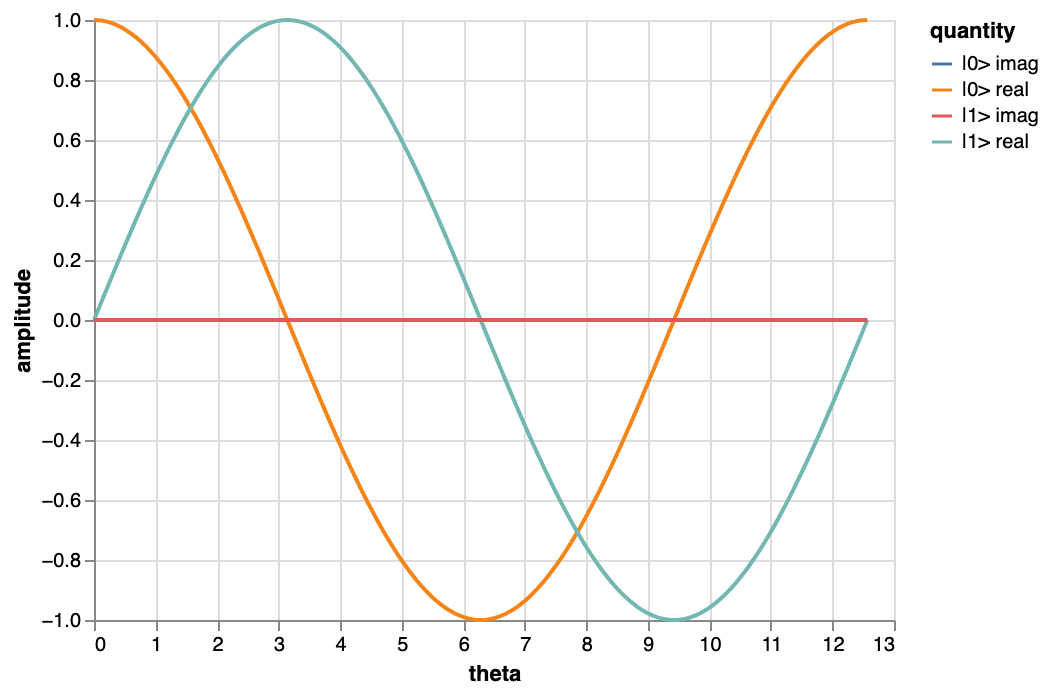

# Universal gate sets

## 1.7.1-Universaloty of rotations

In [34]:
dev = qml.device("default.qubit", wires=1)

##################
# YOUR CODE HERE #
##################

# ADJUST THE VALUES OF PHI, THETA, AND OMEGA
phi, theta, omega = np.pi/2, np.pi/2, np.pi/2


@qml.qnode(dev)
def hadamard_with_rz_rx():
    qml.RZ(phi, wires=0)
    qml.RX(theta, wires=0)
    qml.RZ(omega, wires=0)
    return qml.state()

In [35]:
hadamard_with_rz_rx()

tensor([1.11022302e-16-0.70710678j, 0.00000000e+00-0.70710678j], requires_grad=True)

## 1.7.2-Synthesizing a circuit

In [36]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def convert_to_rz_rx():
    ##################
    # YOUR CODE HERE #
    ##################
    qml.RZ(np.pi/2,wires=0)
    qml.RX(-np.pi/2,wires=0)
    qml.RZ(np.pi/4,wires=0)
    # IMPLEMENT THE CIRCUIT IN THE PICTURE USING ONLY RZ AND RX

    return qml.state()

In [37]:
 convert_to_rz_rx()

tensor([0.27059805-0.65328148j, 0.27059805+0.65328148j], requires_grad=True)

## 1.7.3-Universality of H and T

In [38]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def unitary_with_h_and_t():
    ##################
    # YOUR CODE HERE #
    ##################
    qml.Hadamard(wires=0)
    qml.T(wires=0)
    qml.Hadamard(wires=0)
    qml.T(wires=0)
    qml.T(wires=0)
    qml.Hadamard(wires=0)
    # APPLY ONLY H AND T TO PRODUCE A CIRCUIT THAT EFFECTS THE GIVEN MATRIX

    return qml.state()


In [39]:
unitary_with_h_and_t()

tensor([0.85355339+0.35355339j, 0.35355339+0.14644661j], requires_grad=True)

# Prepare yourself

## 1.8.1-state prepartion

In [40]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def prepare_state():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY OPERATIONS TO PREPARE THE TARGET STATE
    qml.Hadamard(wires=0)
    qml.PhaseShift(np.pi*(5/4),wires=0)

    return qml.state()

In [41]:
prepare_state()

tensor([ 0.70710678+0.j , -0.5       -0.5j], requires_grad=True)

## 1.8.2-State prepration revisited

In [42]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def prepare_state():
    ##################
    # YOUR CODE HERE #
    ##################
    qml.RY(np.pi/3,wires=0)
    qml.RZ(-np.pi/2,wires=0)

    # APPLY OPERATIONS TO PREPARE THE TARGET STATE

    return qml.state()

In [43]:
prepare_state()

tensor([0.61237244+0.61237244j, 0.35355339-0.35355339j], requires_grad=True)

## 1.8.3-State prepration with Mottonen's methode

In [44]:
v = np.array([0.52889389 - 0.14956775j, 0.67262317 + 0.49545818j])

##################
# YOUR CODE HERE #
##################

# CREATE A DEVICE
dev = qml.device("default.qubit", wires=1)

# CONSTRUCT A QNODE THAT USES qml.MottonenStatePreparation
# TO PREPARE A QUBIT IN STATE V, AND RETURN THE STATE

@qml.qnode(dev)
def prepare_state(state=v):
    qml.MottonenStatePreparation(v,wires=0)

    return qml.state()


# This will draw the quantum circuit and allow you to inspect the output gates
print(prepare_state(v))
print()
print(qml.draw(prepare_state, expansion_strategy="device")(v))

[0.52889389-0.14956775j 0.67262317+0.49545818j]

0: ──RY(1.98)──RZ(0.91)──GlobalPhase(-0.18)─┤  State


# Measurment

## 1.9.1-Measuring a superposition

In [45]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_h_and_measure(state):
    """Complete the function such that we apply the Hadamard gate
    and measure in the computational basis.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise leave it in state 0.

    Returns:
        np.array[float]: The measurement outcome probabilities.
    """
    if state == 1:
        qml.PauliX(wires=0)
    qml.Hadamard(wires=0)    

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY HADAMARD AND MEASURE

    return  qml.probs(wires=0)


print(apply_h_and_measure(0))
print(apply_h_and_measure(1))

[0.5 0.5]
[0.5 0.5]


## 1.9.2-Y basis rotation

In [46]:
##################
# YOUR CODE HERE #
##################


# WRITE A QUANTUM FUNCTION THAT PREPARES (1/2)|0> + i(sqrt(3)/2)|1>
def prepare_psi():
    qml.RY(np.pi*2/3,wires=0)
    qml.RZ(np.pi*1/2,wires=0)
    pass


# WRITE A QUANTUM FUNCTION THAT SENDS BOTH |0> TO |y_+> and |1> TO |y_->
def y_basis_rotation():
    qml.Hadamard(wires=0)
    qml.PhaseShift(np.pi/2,wires=0)
    pass


## 1.9.3-Measurment in Y basis

In [47]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def measure_in_y_basis():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE THE STATE
    prepare_psi()

    # PERFORM THE ROTATION BACK TO COMPUTATIONAL BASIS
    qml.adjoint(y_basis_rotation)()    

    # RETURN THE MEASUREMENT OUTCOME PROBABILITIES

    return qml.probs(wires=0)


print(measure_in_y_basis())


[0.9330127 0.0669873]


# What did you expect?

## 1.10.1-Measurment of the PauliY observable

In [48]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def circuit():
    ##################
    # YOUR CODE HERE #
    ##################
    qml.RX(np.pi/4,wires=0)
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)

    # IMPLEMENT THE CIRCUIT IN THE PICTURE AND MEASURE PAULI Y

    return qml.expval(qml.PauliY(wires=0))


print(circuit())

-0.7071067811865471


## 1.10.2-Setting up the  number of experiment shots

In [49]:
# An array to store your results
shot_results = []

# Different numbers of shots
shot_values = [100, 1000, 10000, 100000, 1000000]

for shots in shot_values:
    ##################
    # YOUR CODE HERE #
    ##################
    dev = qml.device("default.qubit", wires=1, shots=shots)
    @qml.qnode(dev)
    def circuit():
        qml.RX(np.pi/4,wires=0)
        qml.Hadamard(wires=0)
        qml.PauliZ(wires=0)
        return qml.expval(qml.PauliY(wires=0))
    shot_results.append(circuit())    

    # CREATE A DEVICE, CREATE A QNODE, AND RUN IT

    # STORE RESULT IN SHOT_RESULTS ARRAY
    pass

print(qml.math.unwrap(shot_results))

[-0.74, -0.722, -0.71, -0.70602, -0.706004]


## 1.10.3-Evaluating a sample

In [50]:
dev = qml.device("default.qubit", wires=1, shots=100000)


@qml.qnode(dev)
def circuit():
    qml.RX(np.pi / 4, wires=0)
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # RETURN THE MEASUREMENT SAMPLES OF THE CORRECT OBSERVABLE

    return  qml.sample(qml.PauliY(wires=0))

In [51]:
circuit()

array([-1., -1., -1., ..., -1., -1., -1.])

In [52]:
def compute_expval_from_samples(samples):
    """Compute the expectation value of an observable given a set of
    sample outputs. You can assume that there are two possible outcomes,
    1 and -1.

    Args:
        samples (np.array[float]): 100000 samples representing the results of
            running the above circuit.

    Returns:
        float: the expectation value computed based on samples.
    """

    estimated_expval = 0
    for sam in samples:
        if sam == 1:
            estimated_expval = 1 + estimated_expval
        if sam == -1: 
            estimated_expval =  estimated_expval -1
    estimated_expval = estimated_expval/len(samples)
    ##################
    # YOUR CODE HERE #
    ##################

    # USE THE SAMPLES TO ESTIMATE THE EXPECTATION VALUE

    return estimated_expval


samples = circuit()
print(compute_expval_from_samples(samples))

-0.7074


## 1.10.4-The variance of sample measurements

In [53]:
def variance_experiment(n_shots):
    """Run an experiment to determine the variance in an expectation
    value computed with a given number of shots.

    Args:
        n_shots (int): The number of shots

    Returns:
        float: The variance in expectation value we obtain running the
        circuit 100 times with n_shots shots each.
    """

    # To obtain a variance, we run the circuit multiple times at each shot value.
    n_trials = 100

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE A DEVICE WITH GIVEN NUMBER OF SHOTS
    dev = qml.device("default.qubit", wires=1, shots=n_shots)

    # DECORATE THE CIRCUIT BELOW TO CREATE A QNODE
    @qml.qnode(dev)
    def circuit():
        qml.Hadamard(wires=0)
        return qml.expval(qml.PauliZ(wires=0))

    variance = []
    for i in range(n_trials):
        variance.append(circuit())
    #av = sum(a)
    #var = 0
    #for i in a:
       # var = (i-av)**2+var
    # RUN THE QNODE N_TRIALS TIMES AND RETURN THE VARIANCE OF THE RESULTS

    return np.var(variance)#var/n_trials

In [54]:
 variance_experiment(10000)

8.7479756e-05

In [55]:
def variance_scaling(n_shots):
    """Once you have determined how the variance in expectation value scales
    with the number of shots, complete this function to programmatically
    represent the relationship.

    Args:
        n_shots (int): The number of shots

    Returns:
        float: The variance in expectation value we expect to see when we run
        an experiment with n_shots shots.
    """

    #estimated_variance = 0

    ##################
    # YOUR CODE HERE #
    ##################
    estimated_variance = 1/(n_shots)


    # ESTIMATE THE VARIANCE BASED ON SHOT NUMBER

    return estimated_variance


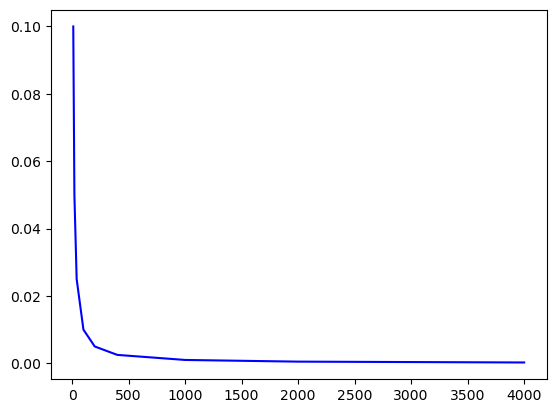

In [56]:
# Various numbers of shots; you can change this
shot_vals = [10, 20, 40, 100, 200, 400, 1000, 2000, 4000]

# Used to plot your results
results_experiment = [variance_experiment(shots) for shots in shot_vals]
results_scaling = [variance_scaling(shots) for shots in shot_vals]
plot = plt.plot(shot_vals, results_scaling,'b')

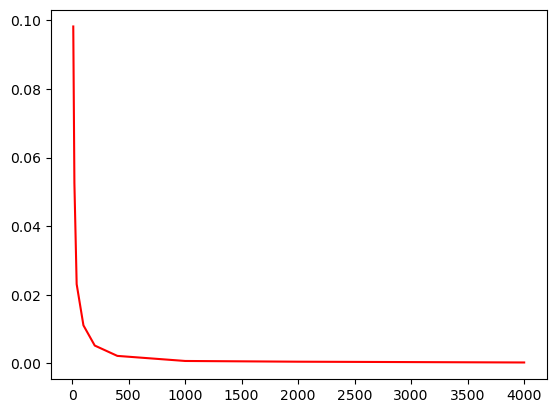

In [57]:
 plot = plt.plot(shot_vals,results_experiment,'r')

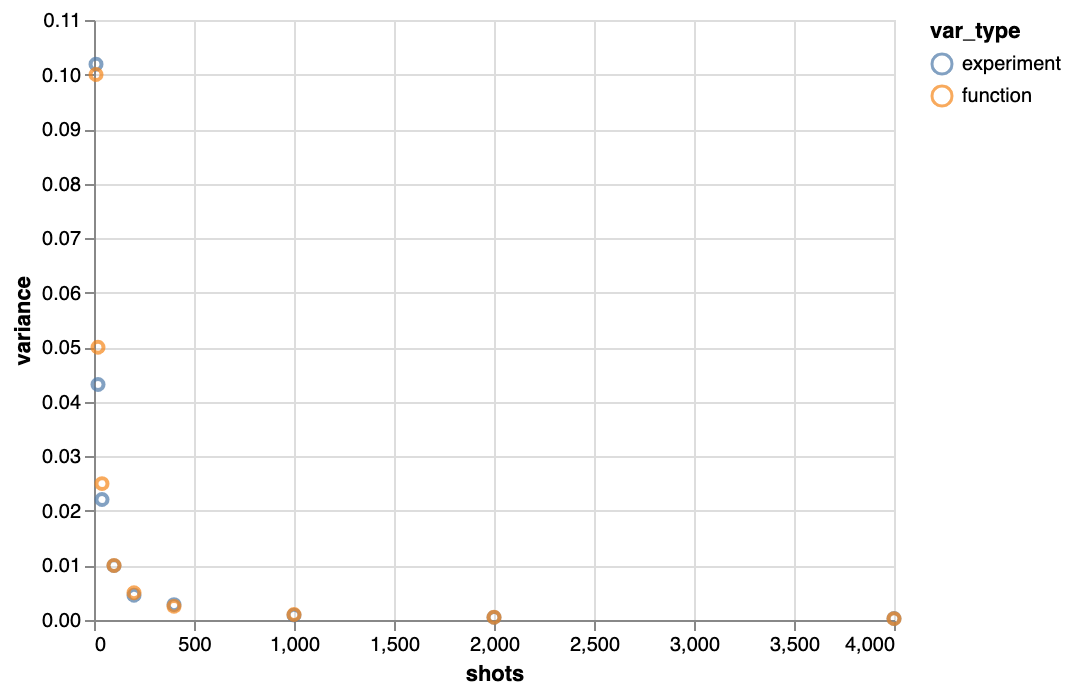

# 3-Circuit with many qubits

# Multi-qubit systems

## 1.11.1-Preparing basis states

In [58]:
num_wires = 3
dev = qml.device("default.qubit", wires=num_wires)


@qml.qnode(dev)
def make_basis_state(basis_id):
    """Produce the 3-qubit basis state corresponding to |basis_id>.

    Note that the system starts in |000>.

    Args:
        basis_id (int): An integer value identifying the basis state to construct.

    Returns:
        np.array[complex]: The computational basis state |basis_id>.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    a = np.binary_repr(basis_id,width= num_wires)
    for i in range(len(a)):
        if a[i] == '1':
            qml.PauliX(wires=i)

    # CREATE THE BASIS STATE

    return qml.state()


basis_id = 3
print(f"Output state = {make_basis_state(basis_id)}")

Output state = [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


## 1.11.2-Separable operation

In [59]:
# Creates a device with *two* qubits
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def two_qubit_circuit():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE |+>|1>
    qml.Hadamard(wires=0)
    qml.PauliX(wires=1)

    # RETURN TWO EXPECTATION VALUES, Y ON FIRST QUBIT, Z ON SECOND QUBIT

    return qml.expval(qml.PauliY(wires=0)),qml.expval(qml.PauliZ(wires=1))


print(two_qubit_circuit())

(tensor(0., requires_grad=True), tensor(-1., requires_grad=True))


## 1.11.3-Expectation value of two qubit observable

In [60]:
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def create_one_minus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE |1>|->
    qml.PauliX(wires=0)
    qml.PauliX(wires=1)
    qml.Hadamard(wires=1)

    # RETURN A SINGLE EXPECTATION VALUE Z \otimes X

    return qml.expval(qml.PauliZ(0)@qml.PauliX(1))


print(create_one_minus())


0.9999999999999996


## 1.11.4-Double Trouble

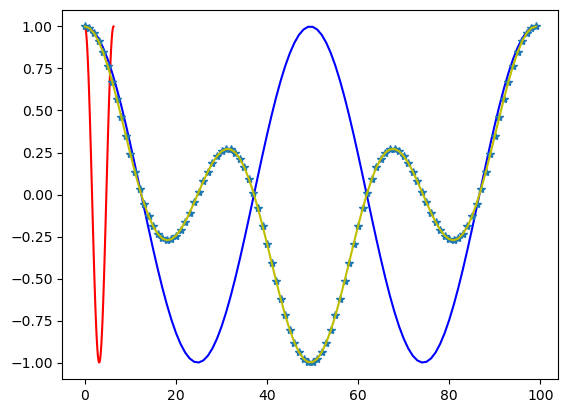

In [61]:
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def circuit_1(theta):
    """Implement the circuit and measure Z I and I Z.

    Args:
        theta (float): a rotation angle.

    Returns:
        float, float: The expectation values of the observables Z I, and I Z
    """
    ##################
    # YOUR CODE HERE #
    ##################
    qml.RX(theta,wires=0)
    qml.RY(2*theta,wires=1)

    return qml.expval(qml.PauliZ(0)),qml.expval(qml.PauliZ(1))


@qml.qnode(dev)
def circuit_2(theta):
    """Implement the circuit and measure Z Z.

    Args:
        theta (float): a rotation angle.

    Returns:
        float: The expectation value of the observable Z Z
    """

    ##################
    # YOUR CODE HERE #
    ##################

    qml.RX(theta,wires=0)
    qml.RY(2*theta,wires=1)

    return qml.expval(qml.PauliZ(0)@ qml.PauliZ(1))


def zi_iz_combination(ZI_results, IZ_results):
    """Implement a function that acts on the ZI and IZ results to
    produce the ZZ results. How do you think they should combine?

    Args:
        ZI_results (np.array[float]): Results from the expectation value of
            ZI in circuit_1.
        IZ_results (np.array[float]): Results from the expectation value of
            IZ in circuit_2.

    Returns:
        np.array[float]: A combination of ZI_results and IZ_results that
        produces results equivalent to measuring ZZ.
    """

    combined_results = np.zeros(len(ZI_results))
    for i in range(len(ZI_results)):
                    combined_results[i]=(ZI_results[i]*IZ_results[i])

    ##################
    # YOUR CODE HERE #
    ##################

    return combined_results


theta = np.linspace(0, 2 * np.pi, 100)

# Run circuit 1, and process the results
circuit_1_results = np.array([circuit_1(t) for t in theta])

ZI_results = circuit_1_results[:, 0]
IZ_results = circuit_1_results[:, 1]
combined_results = zi_iz_combination(ZI_results, IZ_results)

# Run circuit 2
ZZ_results = np.array([circuit_2(t) for t in theta])

# Plot your results
plot = plt.plot(theta, ZI_results,'r', IZ_results,'b', ZZ_results,'*', combined_results,'y')

# All Tied up

# 1.12.1-Entangling operation

In [62]:
num_wires = 2
dev = qml.device("default.qubit", wires=num_wires)


@qml.qnode(dev)
def apply_cnot(basis_id):
    """Apply a CNOT to |basis_id>.

    Args:
        basis_id (int): An integer value identifying the basis state to construct.

    Returns:
        np.array[complex]: The resulting state after applying CNOT|basis_id>.
    """

    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=num_wires)]
    qml.BasisStatePreparation(bits, wires=[0, 1])

    ##################
    # YOUR CODE HERE #
    ##################
    qml.CNOT(wires=[0,1])

    # APPLY THE CNOT

    return qml.state()


##################
# YOUR CODE HERE #
##################
a ={}
for i in range(4):
    for j in range(4):
        if  apply_cnot(i)[j]==1:
            a.update({np.binary_repr(i, width=2):np.binary_repr(j, width=2)})
   
# REPLACE THE BIT STRINGS VALUES BELOW WITH THE CORRECT ONES
cnot_truth_table = {"00": "00", "01": "01", "10": "01", "11": "10"}


# Run your QNode with various inputs to help fill in your truth table
print(apply_cnot(0))
print(a)

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
{'00': '00', '01': '01', '10': '11', '11': '10'}


## 1.12.2-Seprable or Entangled?

In [63]:
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def apply_h_cnot():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY THE OPERATIONS IN THE CIRCUIT
    qml.Hadamard(wires=0)
    qml.CNOT([0,1])

    return qml.state()


print(apply_h_cnot())

##################
# YOUR CODE HERE #
##################

# SET THIS AS 'separable' OR 'entangled' BASED ON YOUR OUTCOME
state_status = "entangled"

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


## 1.12.3-Controled rotations

In [64]:
dev = qml.device("default.qubit", wires=3)


@qml.qnode(dev)
def controlled_rotations(theta, phi, omega):
    """Implement the circuit above and return measurement outcome probabilities.

    Args:
        theta (float): A rotation angle
        phi (float): A rotation angle
        omega (float): A rotation angle

    Returns:
        np.array[float]: Measurement outcome probabilities of the 3-qubit
        computational basis states.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    qml.Hadamard(wires=0)
    qml.CRX(theta, wires=[0, 1])
    qml.CRY(phi, wires=[1, 2])
    qml.CRZ(omega, wires=[2, 0])

    # APPLY THE OPERATIONS IN THE CIRCUIT AND RETURN MEASUREMENT PROBABILITIES

    return qml.probs(wires=[0,1,2])


theta, phi, omega = 0.1, 0.2, 0.3
print(controlled_rotations(theta, phi, omega))

[5.00000000e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.98751041e-01 0.00000000e+00 1.23651067e-03 1.24480103e-05]


# We have got it under control

## 1.13.1-The imposter CZ

In [65]:
dev = qml.device("default.qubit", wires=2)

# Prepare a two-qubit state; change up the angles if you like
phi, theta, omega = 1.2, 2.3, 3.4

def prepare_states(phi, theta, omega):
    qml.RX(phi,wires=0)
    qml.RX(theta,wires=1)
    qml.RZ(omega,wires=1)

@qml.qnode(device=dev)
def true_cz(phi, theta, omega):
    prepare_states(phi, theta, omega)

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE REGULAR CZ GATE HERE
    qml.CZ(wires=[0,1])

    return qml.state()


@qml.qnode(dev)
def imposter_cz(phi, theta, omega):
    prepare_states(phi, theta, omega)

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT CZ USING ONLY H AND CNOT
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[0,1])
    qml.Hadamard(wires=1)

    return qml.state()


print(f"True CZ output state {true_cz(phi, theta, omega)}")
print(f"Imposter CZ output state {imposter_cz(phi, theta, omega)}")

True CZ output state [-0.04343853-0.33432911j  0.74705738+0.09706327j -0.22872685+0.0297179j
 -0.06640456+0.51108945j]
Imposter CZ output state [-0.04343853-0.33432911j  0.74705738+0.09706327j -0.22872685+0.0297179j
 -0.06640456+0.51108945j]


# 1.13.2-The swap gate

In [66]:
dev = qml.device("default.qubit", wires=2)

# Prepare a two-qubit state; change up the angles if you like
phi, theta, omega = 1.2, 2.3, 3.4


@qml.qnode(dev)
def apply_swap(phi, theta, omega):
    prepare_states(phi, theta, omega)

    ##################
    # YOUR CODE HERE #
    ##################
    qml.SWAP(wires=[0,1])

    # IMPLEMENT THE REGULAR SWAP GATE HERE

    return qml.state()


@qml.qnode(dev)
def apply_swap_with_cnots(phi, theta, omega):
    prepare_states(phi, theta, omega)

    ##################
    # YOUR CODE HERE #
    ##################
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[1,0])
    qml.CNOT(wires=[0,1])

    # IMPLEMENT THE SWAP GATE USING A SEQUENCE OF CNOTS

    return qml.state()


print(f"Regular SWAP state = {apply_swap(phi, theta, omega)}")
print(f"CNOT SWAP state = {apply_swap_with_cnots(phi, theta, omega)}")

Regular SWAP state = [-0.04343853-0.33432911j -0.22872685+0.0297179j   0.74705738+0.09706327j
  0.06640456-0.51108945j]
CNOT SWAP state = [-0.04343853-0.33432911j -0.22872685+0.0297179j   0.74705738+0.09706327j
  0.06640456-0.51108945j]


## 1.13.3-The Toffoli Gate

In [67]:
dev = qml.device("default.qubit", wires=3)

# Prepare first qubit in |1>, and arbitrary states on the second two qubits
phi, theta, omega = 1.2, 2.3, 3.4


# A helper function just so you can visualize the initial state
# before the controlled SWAP occurs.
@qml.qnode(dev)
def no_swap(phi, theta, omega):
    prepare_states(phi, theta, omega)
    return qml.state()


@qml.qnode(dev)
def controlled_swap(phi, theta, omega):
    prepare_states(phi, theta, omega)

    ##################
    # YOUR CODE HERE #
    ##################
    qml.Toffoli(wires=[0,1,2])
    qml.Toffoli(wires=[0,2,1])
    qml.Toffoli(wires=[0,1,2])

    # PERFORM A CONTROLLED SWAP USING A SEQUENCE OF TOFFOLIS

    return qml.state()


print(no_swap(phi, theta, omega))
print(controlled_swap(phi, theta, omega))


[-0.04343853-0.33432911j  0.        +0.j          0.74705738+0.09706327j
  0.        +0.j         -0.22872685+0.0297179j   0.        +0.j
  0.06640456-0.51108945j  0.        +0.j        ]
[-0.04343853-0.33432911j  0.        +0.j          0.74705738+0.09706327j
  0.        +0.j         -0.22872685+0.0297179j   0.06640456-0.51108945j
  0.        +0.j          0.        +0.j        ]


## 1.13.4-Mixed controlled gate

In [68]:
dev = qml.device("default.qubit", wires=4)


@qml.qnode(dev)
def four_qubit_mcx():
    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT ABOVE USING A 4-QUBIT MULTI-CONTROLLED X
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)
    qml.MultiControlledX(control_wires=[0, 1, 2], wires=3, control_values= '001')

    return qml.state()


print(four_qubit_mcx())

[0.35355339+0.j 0.        +0.j 0.        +0.j 0.35355339+0.j
 0.35355339+0.j 0.        +0.j 0.35355339+0.j 0.        +0.j
 0.35355339+0.j 0.        +0.j 0.35355339+0.j 0.        +0.j
 0.35355339+0.j 0.        +0.j 0.35355339+0.j 0.        +0.j]


/Users/neda/anaconda3/lib/python3.11/site-packages/pennylane/ops/op_math/controlled_ops.py:1071: PennyLaneDeprecationWarning: Specifying control values using a bitstring is deprecated, and will not be supported in future releases, Use a list of booleans or integers instead.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-packages/pennylane/ops/op_math/controlled_ops.py:1077: UserWarning: The control_wires keyword for MultiControlledX is deprecated, and will be removed soon. Use wires = (*control_wires, target_wire) instead.
  warnings.warn(


## 1.13.5-The 3-controlled Not

In [69]:
# Wires 0, 1, 2 are the control qubits
# Wire 3 is the auxiliary qubit
# Wire 4 is the target
dev = qml.device("default.qubit", wires=5)


@qml.qnode(dev)
def four_qubit_mcx_only_tofs():
    # We will initialize the control qubits in state |1> so you can see
    # how the output state gets changed.
    qml.PauliX(wires=0)
    qml.PauliX(wires=1)
    qml.PauliX(wires=2)

    ##################
    # YOUR CODE HERE #
    ##################
    qml.Toffoli(wires=[0,1,3])
    qml.Toffoli(wires=[2,3,4])
    qml.Toffoli(wires=[0,1,3])

    # IMPLEMENT A 3-CONTROLLED NOT WITH TOFFOLIS

    return qml.state()


print(four_qubit_mcx_only_tofs())

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j
 0.+0.j 0.+0.j]


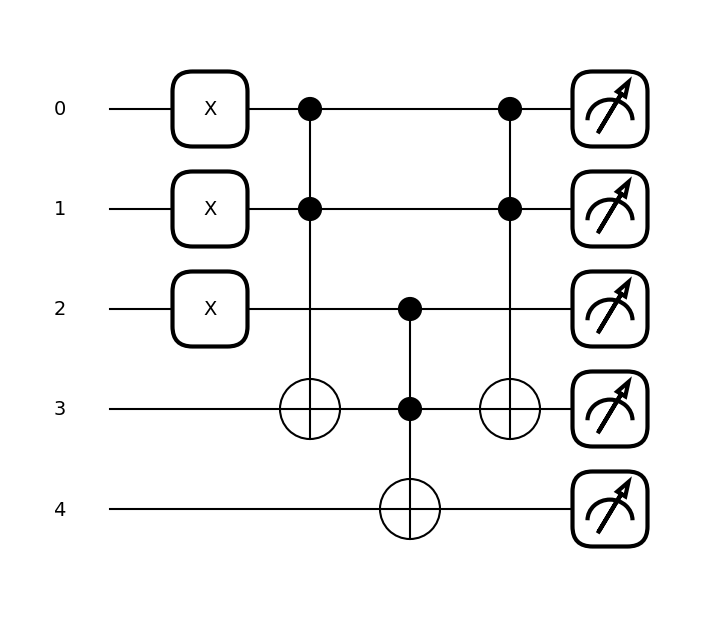

In [70]:
import matplotlib.pyplot as plt
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(four_qubit_mcx_only_tofs)()
plt.show()

# Multi-Qubit Gate Challenge

## 1.14.1-The Bell states

In [71]:
dev = qml.device("default.qubit", wires=2)

# Starting from the state |00>, implement a PennyLane circuit
# to construct each of the Bell basis states.


@qml.qnode(dev)
def prepare_psi_plus():
    ##################
    # YOUR CODE HERE #
    ##################
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])

    # PREPARE (1/sqrt(2)) (|00> + |11>)

    return qml.state()


@qml.qnode(dev)
def prepare_psi_minus():
    ##################
    # YOUR CODE HERE #
    ##################
    qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])    

    # PREPARE (1/sqrt(2)) (|00> - |11>)

    return qml.state()


@qml.qnode(dev)
def prepare_phi_plus():
    ##################
    # YOUR CODE HERE #
    ##################
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    qml.PauliX(wires=1)

    # PREPARE  (1/sqrt(2)) (|01> + |10>)

    return qml.state()


@qml.qnode(dev)
def prepare_phi_minus():
    ##################
    # YOUR CODE HERE #
    ##################
    qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    qml.PauliX(wires=1)
    # PREPARE  (1/sqrt(2)) (|01> - |10>)

    return qml.state()


psi_plus = prepare_psi_plus()
psi_minus = prepare_psi_minus()
phi_plus = prepare_phi_plus()
phi_minus = prepare_phi_minus()

# Uncomment to print results
print(f"|ψ_+> = {psi_plus}")
print(f"|ψ_-> = {psi_minus}")
print(f"|ϕ_+> = {phi_plus}")
print(f"|ϕ_-> = {phi_minus}")

|ψ_+> = [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
|ψ_-> = [ 0.70710678+0.j  0.        +0.j  0.        +0.j -0.70710678+0.j]
|ϕ_+> = [0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]
|ϕ_-> = [ 0.        +0.j  0.70710678+0.j -0.70710678+0.j  0.        +0.j]


## 1.14.2-Quantum Multiplexer

In [72]:
dev = qml.device("default.qubit", wires=3)

# State of first 2 qubits
state = [0, 1]


@qml.qnode(device=dev)
def apply_control_sequence(state):
    # Set up initial state of the first two qubits
    if state[0] == 1:
        qml.PauliX(wires=0)
    if state[1] == 1:
        qml.PauliX(wires=1)

    # Set up initial state of the third qubit - use |->
    # so we can see the effect on the output
    qml.PauliX(wires=2)
    qml.Hadamard(wires=2)

    ##################
    # YOUR CODE HERE #
    ##################
    qml.PauliX(wires=0)
    qml.Toffoli(wires=[0,1,2])
    qml.PauliX(wires=0)
    qml.PauliX(wires=1)
    qml.Hadamard(wires=2)
    qml.Toffoli(wires=[0,1,2])
    qml.Hadamard(wires=2)
    qml.PauliX(wires=1)
    qml.adjoint(qml.S)(wires=2)
    qml.Toffoli(wires=[0,1,2])
    qml.S(wires=2)

    # IMPLEMENT THE MULTIPLEXER
    # IF STATE OF FIRST TWO QUBITS IS 01, APPLY X TO THIRD QUBIT

    # IF STATE OF FIRST TWO QUBITS IS 10, APPLY Z TO THIRD QUBIT

    # IF STATE OF FIRST TWO QUBITS IS 11, APPLY Y TO THIRD QUBIT

    return qml.state()


print(apply_control_sequence(state))

[ 0.        +0.j  0.        +0.j -0.70710678+0.j  0.70710678+0.j
  0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]


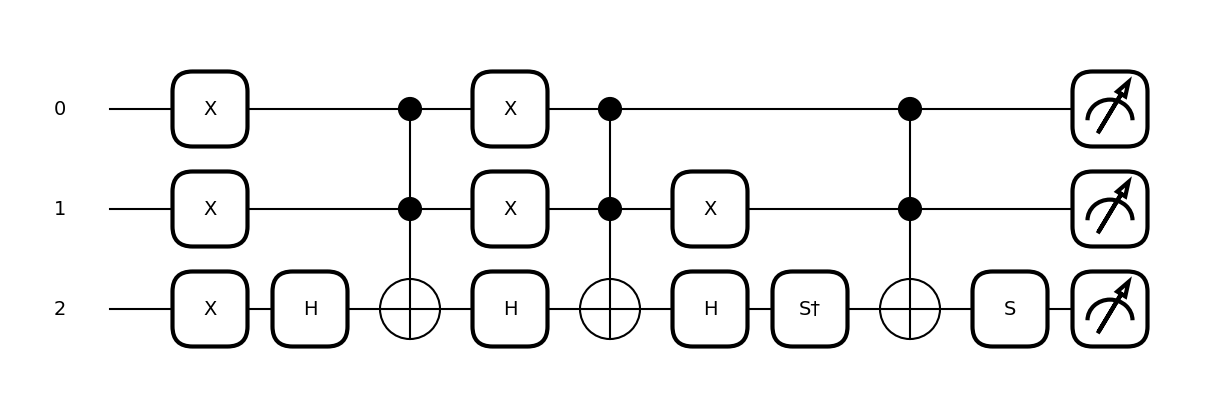

In [73]:
import matplotlib.pyplot as plt
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(apply_control_sequence)(state)
plt.show()